<a href="https://colab.research.google.com/github/sanjay7178/pytorch-dip/blob/main/Python_Image_Restoration_Frequency_Domain_Filtering_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!curl  "https://fastly.picsum.photos/id/866/450/300.jpg?hmac=LjxXLARrOTbivRrQD3Z2n3fNVwGNy21JDJduhoRLJ-s" --output 300.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11563  100 11563    0     0  70181      0 --:--:-- --:--:-- --:--:-- 70506


In [17]:
import os
print(os.path.exists('/content/300.jpg'))  # Should print True if the file exists

True


In [18]:
from google.colab.patches import cv2_imshow

In [19]:
import matplotlib.pyplot as  plt

(300, 450)
Degraded Image


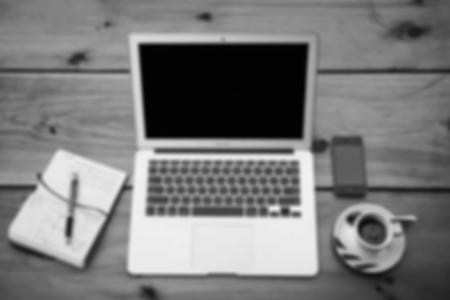

Restored Image


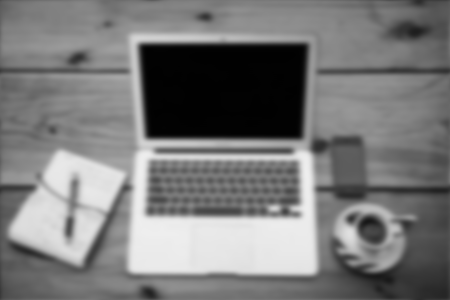

In [15]:
import numpy as np
import cv2

# Load the degraded image
img = cv2.imread('/content/300.jpg', 0)  # Read as grayscale
print(img.shape)

# Perform Fourier Transform
f = np.fft.fft2(img)

# Shift zero frequency component to the center
fshift = np.fft.fftshift(f)

# Create a Gaussian low-pass filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
d = 30  # Filter cutoff distance
gaussian_filter = np.zeros((rows, cols), np.float32)
for i in range(rows):
    for j in range(cols):
        gaussian_filter[i, j] = np.exp(-((i - crow)**2 + (j - ccol)**2) / (2 * d**2))

# Apply the filter in the frequency domain
filtered_fshift = fshift * gaussian_filter

# Shift zero frequency component back to the top left
filtered_f = np.fft.ifftshift(filtered_fshift)

# Perform Inverse Fourier Transform
filtered_img = np.fft.ifft2(filtered_f)
filtered_img = np.abs(filtered_img)

# Display the degraded image with title
print('Degraded Image')
cv2_imshow(img)


# Display the restored image with title
print('Restored Image')
cv2_imshow(filtered_img.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()